In [ ]:
import keras
# from data_handlers import *
import pandas as pd
import numpy as np

In [ ]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train/255.0
x_test = x_test/255.0
y_train = np.reshape(y_train, (len(y_train), 1))

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
X_train.shape,y_train.shape, X_val.shape,y_val.shape

((48000, 784), (48000, 1), (12000, 784), (12000, 1))

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(784, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(400, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
    
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_val, y_val)
)

Epoch 1/30
1500/1500 [==============================] - 37s 24ms/step - loss: 0.2767 - accuracy: 0.9181 - val_loss: 0.1590 - val_accuracy: 0.9528
Epoch 2/30
1500/1500 [==============================] - 36s 24ms/step - loss: 0.1453 - accuracy: 0.9603 - val_loss: 0.1049 - val_accuracy: 0.9718
Epoch 3/30
1500/1500 [==============================] - 36s 24ms/step - loss: 0.1137 - accuracy: 0.9686 - val_loss: 0.1158 - val_accuracy: 0.9688
Epoch 4/30
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0944 - accuracy: 0.9739 - val_loss: 0.1138 - val_accuracy: 0.9724
Epoch 5/30
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0870 - accuracy: 0.9761 - val_loss: 0.1001 - val_accuracy: 0.9750
Epoch 6/30
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0749 - accuracy: 0.9794 - val_loss: 0.1040 - val_accuracy: 0.9754
Epoch 7/30
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0701 - accuracy: 0.9808 - val_loss: 0.1053 -

In [ ]:
predictions = model.predict(x_test)
y_preds = predictions.argmax(axis =1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.96      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
def accuracy(y_hat, y):
    
    assert(y_hat.size == y.size)
    count=0
    for i in range(y.size):
        if (y[i]==y_hat[i]):
            count = count + 1
    acc = count/y.size
    return acc
    pass

print(accuracy(y_preds,y_test))

0.9816


In [ ]:
import itertools
from sklearn.metrics import confusion_matrix


# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
class_names = ['0', '1', '2', '3', '4', 
               '5', '6', '7', '8', '9']

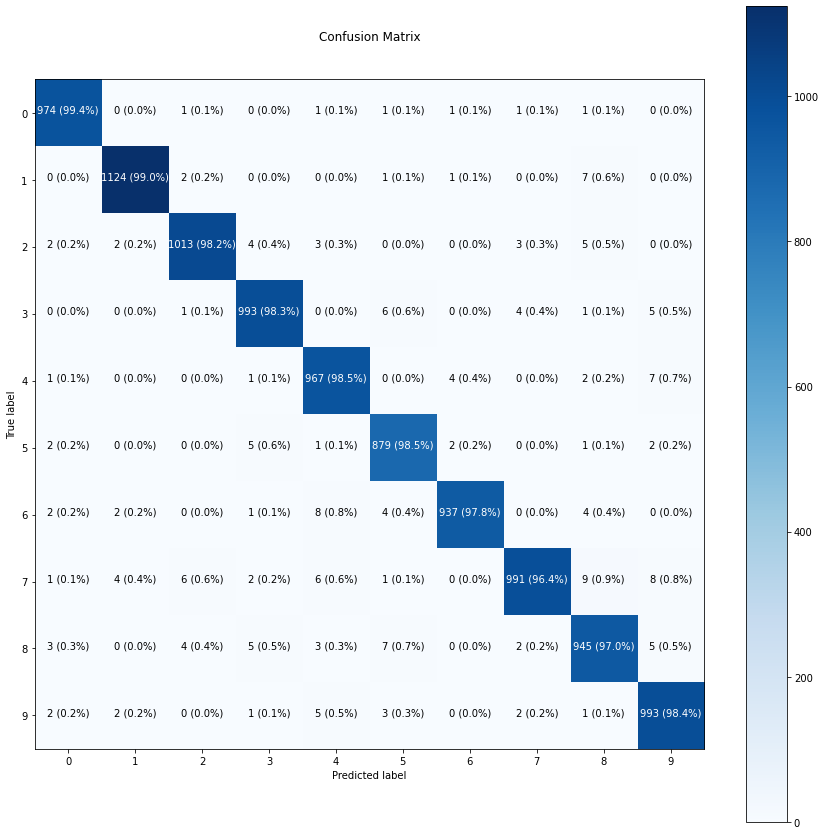

In [ ]:
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 784)               784784    
                                                                 
 dropout_1 (Dropout)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 400)               314000    
                                                                 
 dropout_2 (Dropout)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 200)               8

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

y_test1 = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9])
y_preds1 = label_binarize(y_preds, classes=[0,1,2,3,4,5,6,7,8,9])

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_preds1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_preds1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

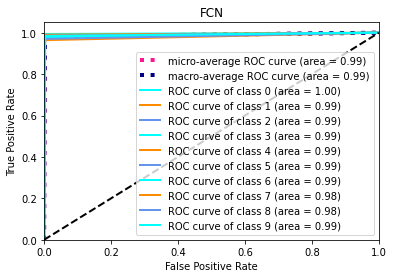

In [ ]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(10)]))
lw=2
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(10):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 10

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(10), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("FCN")
plt.legend(loc="lower right")
plt.show()